In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados_aula_1 = pd.read_csv('./dados_aula1.csv')
dados_aula_2 = pd.read_csv('./dados_aula2.csv')

In [3]:
dados_aula_1

,L,n,m
0,1.053,6,0.0526
1,1.053,5,0.0650
2,1.053,4,0.1047
3,1.053,3,0.1651
4,0.894,4,0.0713
5,1.060,3,0.1316
6,0.800,3,0.1049
7,0.713,3,0.0713


In [4]:
dados_aula_2

,Comprimento (cm),Peso (g),Barrigas
0,12.5,13.2,1
1,26.3,13.2,2
2,33.8,13.2,3
3,47.9,13.2,4
4,56.5,13.2,5
5,72.0,13.2,6
6,12.4,14.7,1
7,26.5,14.7,2
8,36.8,14.7,3
9,47.5,14.7,4


In [5]:
medidas_de_massa = dados_aula_2['Peso (g)'].unique()

In [6]:
medidas_de_massa

array([ 13.2,  14.7,  33.3,  45.3, 104.4, 105.6, 213.6])

In [7]:
massas_separadas = [dados_aula_2.where(dados_aula_2['Peso (g)'] == p).dropna() for p in medidas_de_massa]

[[<matplotlib.lines.Line2D at 0x7fadeaa1de10>],

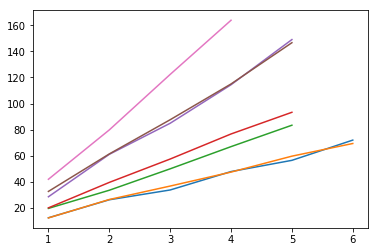

In [8]:
[plt.plot(df['Barrigas'], df['Comprimento (cm)']) for df in massas_separadas]

In [9]:
plt.show()

In [10]:
def x(l, f, n):
    return np.power((l * 2 * f)/n, 2)

def y(m, g):
    return m * g

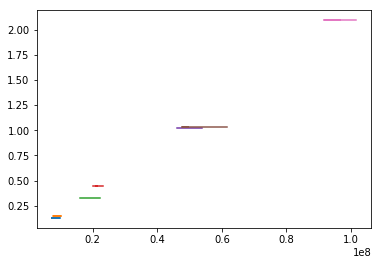

In [11]:
[plt.plot(x(df['Comprimento (cm)'], 120, df['Barrigas']), y(df['Peso (g)'] * 0.001, 9.8)) for df in massas_separadas]
plt.show()

In [12]:
harmonicos_separados = [dados_aula_2.where(dados_aula_2['Barrigas'] == p).dropna() for p in dados_aula_2['Barrigas'].unique()]

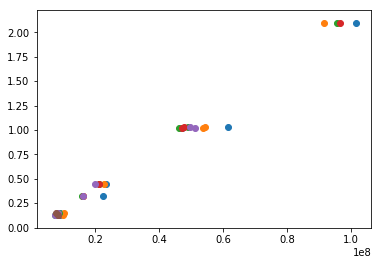

In [13]:
[plt.scatter(x(df['Comprimento (cm)'], 120, df['Barrigas']), y(df['Peso (g)'] * 0.001, 9.8)) for df in harmonicos_separados]
plt.show()

In [14]:
from sklearn import linear_model

models = [linear_model.LinearRegression().fit(
    pd.DataFrame(x(df['Comprimento (cm)'], 120, df['Barrigas'])),
    y(df['Peso (g)'] * 0.001, 9.8)) for df in  harmonicos_separados]

[[<matplotlib.lines.Line2D at 0x7faddf0f1160>],

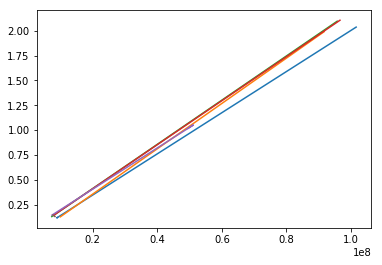

In [15]:
[plt.plot(
    pd.DataFrame(x(harmonicos_separados[i]['Comprimento (cm)'], 120, harmonicos_separados[i]['Barrigas'])),
    model.predict(pd.DataFrame(x(harmonicos_separados[i]['Comprimento (cm)'], 120, harmonicos_separados[i]['Barrigas'])))) for i, model in enumerate(models)]

In [16]:
plt.show()

Nao ta acabado

Eu sei

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

In [29]:
model = sm.OLS(np.array(harmonicos_separados[0]['Peso (g)']),
               (np.array(harmonicos_separados[0]['Comprimento (cm)'] / 100 * 240 / 1))**2)
result = model.fit()
result.summary()

/home/tiago/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     619.0
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.77e-07
Time:                        20:41:45   Log-Likelihood:                -25.968
No. Observations:                   7   AIC:                             53.94
Df Residuals:                       6   BIC:                             53.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0201      0.001     24.881      0.000       0.018       0.022
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.706
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.341
Skew:                          -0.038   Prob(JB):                        0.843
Kurtosis:                       1.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model = sm.OLS(np.array(harmonicos_separados[1]['Peso (g)']),
               (np.array(harmonicos_separados[1]['Comprimento (cm)'] / 100 * 240 / 2))**2)
result = model.fit()
result.summary()

/home/tiago/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     652.2
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.37e-07
Time:                        21:10:00   Log-Likelihood:                -25.787
No. Observations:                   7   AIC:                             53.57
Df Residuals:                       6   BIC:                             53.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0215      0.001     25.539      0.000       0.019       0.024
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.310
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.712
Skew:                           1.457   Prob(JB):                        0.258
Kurtosis:                       3.900   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model = sm.OLS(np.array(harmonicos_separados[2]['Peso (g)']),
               (np.array(harmonicos_separados[2]['Comprimento (cm)'] / 100 * 240 / 3))**2)
result = model.fit()
result.summary()

/home/tiago/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7955.
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.34e-10
Time:                        21:10:20   Log-Likelihood:                -17.063
No. Observations:                   7   AIC:                             36.13
Df Residuals:                       6   BIC:                             36.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0221      0.000     89.193      0.000       0.022       0.023
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.410
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.727
Skew:                           0.537   Prob(JB):                        0.695
Kurtosis:                       1.843   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model = sm.OLS(np.array(harmonicos_separados[3]['Peso (g)']),
               (np.array(harmonicos_separados[3]['Comprimento (cm)'] / 100 * 240 / 4))**2)
result = model.fit()
result.summary()

/home/tiago/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9743.
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           7.29e-11
Time:                        21:10:37   Log-Likelihood:                -16.354
No. Observations:                   7   AIC:                             34.71
Df Residuals:                       6   BIC:                             34.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0220      0.000     98.706      0.000       0.021       0.023
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.199
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.600
Skew:                          -0.414   Prob(JB):                        0.741
Kurtosis:                       1.828   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model = sm.OLS(np.array(harmonicos_separados[4]['Peso (g)']),
               (np.array(harmonicos_separados[4]['Comprimento (cm)'] / 100 * 240 / 5))**2)
result = model.fit()
result.summary()

/home/tiago/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3875.
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.02e-08
Time:                        21:10:54   Log-Likelihood:                -13.627
No. Observations:                   6   AIC:                             29.25
Df Residuals:                       5   BIC:                             29.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0209      0.000     62.252      0.000       0.020       0.022
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.251
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.745
Skew:                           0.494   Prob(JB):                        0.689
Kurtosis:                       1.584   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model = sm.OLS(np.array(harmonicos_separados[5]['Peso (g)']),
               (np.array(harmonicos_separados[5]['Comprimento (cm)'] / 100 * 240 / 6))**2)
result = model.fit()
result.summary()

/home/tiago/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     121.5
Date:                Wed, 05 Sep 2018   Prob (F-statistic):             0.0576
Time:                        21:11:16   Log-Likelihood:                -3.3033
No. Observations:                   2   AIC:                             8.607
Df Residuals:                       1   BIC:                             7.300
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0174      0.002     11.025      0.058      -0.003       0.037
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.997
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""